Amac veri seti icerisindeki karmasik yapilari basit karar yapilarina donusturmek
Heterojen veri setleri belirelnmis bir hedef degiskene gore homojen alt gruplara ayrilir

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']]) #kategorik degiskenleri dummy degiskenlere donusturduk
y=df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')# bu 4 sutun kaldirir kalan sutunlari da float64 veri turune cevirir
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [20]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [22]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

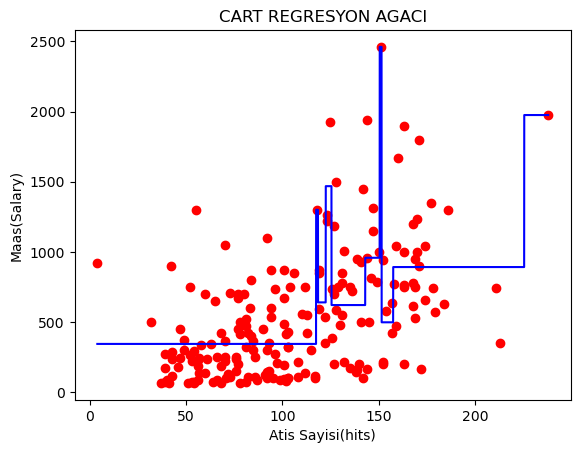

In [24]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color='red')

plt.plot(X_grid,cart_model.predict(X_grid),color='blue')

plt.title('CART REGRESYON AGACI')
plt.xlabel('Atis Sayisi(hits)')
plt.ylabel('Maas(Salary)');

In [26]:
#tahmin
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [28]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [30]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']]) #kategorik degiskenleri dummy degiskenlere donusturduk
y=df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')# bu 4 sutun kaldirir kalan sutunlari da float64 veri turune cevirir
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [34]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

543.1419647874873

### Model Tuning

In [37]:
cart_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

519.0132904058036

In [41]:
cart_params = {"max_depth" : [2,3,4,5,10,20],
               "min_samples_split" : [2,10,5,30,50,100]}

In [ ]:
cart_model = DecisionTreeRegressor()

In [43]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [45]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [49]:
cart_tuned = DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)

In [51]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434